#### A little bit of data procesing.  Applying the same yes/no mapping as before, but normalizing the other categorical columns.

In [1]:
# read initial data set (same as used in previous courses/projects), store as dataframe
import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/maxgs/MSDA/D208 Predictive Modeling/churn_clean.csv')

In [2]:
#display categorical columns of entire dataframe
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
0,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,Urban,America/Sitka,Environmental health practitioner,Widowed,...,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic)
1,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,Urban,America/Detroit,"Programmer, multimedia",Married,...,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic)
2,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,Urban,America/Los_Angeles,Chief Financial Officer,Widowed,...,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic)
3,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,Suburban,America/Los_Angeles,Solicitor,Married,...,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check
4,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,Suburban,America/Chicago,Medical illustrator,Separated,...,No,No,No,No,No,Yes,Yes,No,No,Mailed Check


In [3]:
# subset dataframe for select vars
rf_df = df[['Bandwidth_GB_Year', 'Tenure', 'Population', 'Area', 
       'Children', 'Age', 'Income', 'Marital', 'Gender', 
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharge',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8']]

In [48]:
#display categorical columns of initial model dataframe
num_rf_df = rf_df.select_dtypes(include=['number']).copy()
num_rf_df.head()

,Bandwidth_GB_Year,Tenure,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,PaperlessBilling,MonthlyCharge,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,904.536110,6.795513,38,0,68,28561.99,7.978323,10,0,1,...,1,172.455519,5,5,5,3,4,4,3,4
1,800.982766,1.156681,10446,1,27,21704.77,11.699080,12,0,1,...,1,242.632554,3,4,3,3,4,3,4,4
2,2054.706961,15.754144,3735,4,50,9609.57,10.752800,9,0,1,...,1,159.947583,4,4,2,4,4,3,3,3
3,2164.579412,17.087227,13863,1,48,18925.23,14.913540,15,2,0,...,1,119.956840,4,4,4,2,5,4,3,3
4,271.493436,1.670972,11352,0,83,40074.19,8.147417,16,2,1,...,0,149.948316,4,4,4,3,4,4,4,5


In [53]:
num_rf_df.columns

Index(['Bandwidth_GB_Year', 'Tenure', 'Population', 'Children', 'Age',
       'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone',
       'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharge', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6',
       'Item7', 'Item8'],
      dtype='object')

In [ ]:
#display numerical columns of initial model dataframe
obj_rf_df = rf_df.select_dtypes(include=['object']).copy()
obj_rf_df.head()

In [5]:
# subset for binary columns
yn_df = rf_df[['Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']]
yn_df.head()

,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,No,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes
1,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes
2,Yes,Yes,No,Yes,Yes,No,No,No,No,No,Yes,Yes
3,Yes,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes
4,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No


In [6]:
# supressing non-crucial warnings from output

import warnings
warnings.filterwarnings('ignore')

In [7]:
# map yes/no values to 1 and 0
yn_mapping = {'No' : 0, 'Yes' : 1}
for column in yn_df: 
    rf_df[column] = rf_df[column].map(yn_mapping)

In [8]:
# checking that yes/no now appear as 1/0
rf_df[['Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']].head()

,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0,1,1,1,0,1,1,0,0,0,1,1
1,1,0,1,1,1,1,0,0,0,1,1,1
2,1,1,0,1,1,0,0,0,0,0,1,1
3,1,0,0,1,0,1,0,0,0,1,0,1
4,0,1,0,0,0,0,0,0,1,1,0,0


In [9]:
rf_df[['Area', 'Marital', 'Gender', 'Contract', 'InternetService', 'PaymentMethod']].head(10)

,Area,Marital,Gender,Contract,InternetService,PaymentMethod
0,Urban,Widowed,Male,One year,Fiber Optic,Credit Card (automatic)
1,Urban,Married,Female,Month-to-month,Fiber Optic,Bank Transfer(automatic)
2,Urban,Widowed,Female,Two Year,DSL,Credit Card (automatic)
3,Suburban,Married,Male,Two Year,DSL,Mailed Check
4,Suburban,Separated,Male,Month-to-month,Fiber Optic,Mailed Check
5,Urban,Never Married,Female,One year,None,Electronic Check
6,Suburban,Widowed,Male,Month-to-month,DSL,Electronic Check
7,Suburban,Married,Female,Month-to-month,DSL,Mailed Check
8,Suburban,Separated,Nonbinary,Month-to-month,DSL,Bank Transfer(automatic)
9,Rural,Married,Female,Two Year,Fiber Optic,Mailed Check


In [10]:
# apply one-hot encoding to non-binary categorical columns
rf_df_ohe = pd.get_dummies(rf_df, columns = ['Area', 'Marital', 'Gender', 'Contract', 'InternetService', 'PaymentMethod']) 

In [11]:
rf_df_ohe.head()

,Bandwidth_GB_Year,Tenure,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,Contract_Month-to-month,Contract_One year,Contract_Two Year,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,904.536110,6.795513,38,0,68,28561.99,7.978323,10,0,1,...,0,1,0,0,1,0,0,1,0,0
1,800.982766,1.156681,10446,1,27,21704.77,11.699080,12,0,1,...,1,0,0,0,1,0,1,0,0,0
2,2054.706961,15.754144,3735,4,50,9609.57,10.752800,9,0,1,...,0,0,1,1,0,0,0,1,0,0
3,2164.579412,17.087227,13863,1,48,18925.23,14.913540,15,2,0,...,0,0,1,1,0,0,0,0,0,1
4,271.493436,1.670972,11352,0,83,40074.19,8.147417,16,2,1,...,1,0,0,0,1,0,0,0,0,1


In [12]:
rf_df_ohe.describe()

,Bandwidth_GB_Year,Tenure,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,Contract_Month-to-month,Contract_One year,Contract_Two Year,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
count,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,3392.341550,34.526188,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,...,0.545600,0.210200,0.244200,0.346300,0.440800,0.212900,0.222900,0.208300,0.339800,0.22900
std,2185.294852,26.443063,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,...,0.497941,0.407471,0.429633,0.475814,0.496508,0.409378,0.416213,0.406113,0.473665,0.42021
min,155.506715,1.000259,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1236.470827,7.917694,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,3279.536903,35.430507,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,5586.141369,61.479795,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000
max,7158.981530,71.999280,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### Model Analysis

Data was never scaled, or normalized, during the first attempt at this.  With tree-based regression, doing so isn't entirely necessary, but it can help with interpreting model performance metrics.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn_pandas import DataFrameMapper
scaler = MinMaxScaler()  # normalize data for ranges 0 to 1
mapper = DataFrameMapper([(rf_df_ohe.columns, scaler)])
scaled_features = mapper.fit_transform(rf_df_ohe.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=rf_df_ohe.index, columns=rf_df_ohe.columns)

#scaler = StandardScaler()
#rf_df_ohe_scaled = scaler.fit_transform(rf_df_ohe.values)

In [14]:
scaled_features_df

,Bandwidth_GB_Year,Tenure,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,Contract_Month-to-month,Contract_One year,Contract_Two Year,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,0.106951,0.081624,0.000340,0.0,0.704225,0.109120,0.373260,0.409091,0.000000,0.166667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.092165,0.002203,0.093393,0.1,0.126761,0.082599,0.549537,0.500000,0.000000,0.166667,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.271180,0.207804,0.033393,0.4,0.450704,0.035818,0.504705,0.363636,0.000000,0.166667,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.286868,0.226580,0.123943,0.1,0.422535,0.071848,0.701827,0.636364,0.285714,0.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.016561,0.009447,0.101493,0.0,0.915493,0.153646,0.381271,0.681818,0.285714,0.166667,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.907513,0.946448,0.005722,0.3,0.070423,0.214174,0.441369,0.500000,0.285714,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,0.791099,0.845647,0.689924,0.4,0.422535,0.130653,0.314618,0.636364,0.285714,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9997,0.571688,0.653764,0.003630,0.1,0.422535,0.176501,0.307529,0.409091,0.000000,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9998,0.901403,0.987272,0.318060,0.1,0.295775,0.063117,0.567200,0.590909,0.142857,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Model 1.  Trying broader ranges of parameter values in random grid search.  Setting oob=true in order to use 'out of box' score as performance metric (this is actually the same as R^2)


In [15]:
# Create arrays for the features and the response variable
y2 = scaled_features_df['Bandwidth_GB_Year']
X2 = scaled_features_df.drop('Bandwidth_GB_Year', axis=1)

In [16]:
# split data into training and testing sets with 3 different splits
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state=42)

# simultaneously trying 3 splits like this ended up giving the same results for each
#X20_train, X20_test, y20_train, y20_test = train_test_split(X2, y2, test_size = 0.2, random_state=42)
#X25_train, X25_test, y25_train, y25_test = train_test_split(X2, y2, test_size = 0.25, random_state=42)
#X30_train, X30_test, y30_train, y30_test = train_test_split(X2, y2, test_size = 0.3, random_state=42)

In [17]:
# look at random forest regressor hyperparameters
#from sklearn.ensemble import RandomForestRegressor
#RandomForestRegressor().get_params()

In [18]:
import numpy as np

### As comparison, a base model only specifying n_estimators was initialized.

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE, r2_score

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Base Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

# initialize base model
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X2_train, y2_train)
base_accuracy = evaluate(base_model, X2_test, y2_test)
# Predict test set labels
y2_pred_base = base_model.predict(X2_test)

# Compute mean squared error
mse_base = MSE(y2_test, y2_pred_base)

# Compute root mean squared error
rmse_base = MSE(y2_test, y2_pred_base)**(1/2)

# Compute R^2
r2_base = r2_score(y2_test,y2_pred_base)

# oob_score
oob_score_base = base_model.score(X2_test, y2_test)

# Print rmse_test
print("Results for base model:")
print(base_model)
print('MSE of base model: ', round(mse_base,2)) 
print('RMSE of base model: ', round(rmse_base,2)) 
print('R^2 of base model: ', round(r2_base,2)) 
print('oob_score: ', round(oob_score_base,2))

Base Model Performance
Average Error: 0.0113 degrees.
Accuracy = 94.91%.
Results for base model:
RandomForestRegressor(n_estimators=10, random_state=42)
MSE of base model:  0.0
RMSE of base model:  0.01
R^2 of base model:  1.0
oob_score:  1.0


### Now to experiment with some parameters using random grid search cross validation.

In [20]:



# Finish the dictionary by adding the max_depth parameter
param_dist = {'n_estimators' : np.arange(10, 200, 10),
              #'n_estimators': [100,250,500],
              "max_depth": [2, 4, 6, 8],
              "max_features": np.arange(2, 57, 2),
              "min_samples_split": [2, 4, 8, 16],
              #"oob_score" : True
             }

# Create a random forest regression model
rf = RandomForestRegressor(random_state=1111, oob_score = True)

# Create a scorer to use (use the mean squared error)
scorer = make_scorer(mean_squared_error)

In [21]:
# Import the method for random search
from sklearn.model_selection import RandomizedSearchCV

# Build a random search using param_dist, rfr, and scorer
rs = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_dist,
        n_iter=30,
        cv=5,
        scoring=scorer)

rs.fit(X2_train, y2_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=1111),
                   n_iter=30,
                   param_distributions={'max_depth': [2, 4, 6, 8],
                                        'max_features': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56]),
                                        'min_samples_split': [2, 4, 8, 16],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   scoring=make_scorer(mean_squared_error))

In [22]:


# Extract the best estimator
best_model = rs.best_estimator_

# Predict test set labels
y2_pred = best_model.predict(X2_test)

# Compute mean squared error
mse = mean_squared_error(y2_test, y2_pred)

# Compute root mean squared error
rmse = MSE(y2_test, y2_pred)**(1/2)

# Compute R^2
r2 = r2_score(y2_test,y2_pred)

# oob_score
oob_score = best_model.score(X2_test, y2_test)

# best_random 
random_accuracy = evaluate(best_model, X2_test, y2_test)

# Print rmse_test
print("Results for best model:")
print(best_model)
print('MSE of best model: ', round(mse,2)) 
print('RMSE of best model: ', round(rmse,2)) 
print('R^2 of best model: ', round(r2,2)) 
print('oob_score: ', round(oob_score,2))
print('Accuracy of best model: ', round(random_accuracy,2))


Base Model Performance
Average Error: 0.2120 degrees.
Accuracy = -15.09%.
Results for best model:
RandomForestRegressor(max_depth=4, max_features=4, min_samples_split=4,
                      n_estimators=70, oob_score=True, random_state=1111)
MSE of best model:  0.05
RMSE of best model:  0.23
R^2 of best model:  0.46
oob_score:  0.46
Accuracy of best model:  -15.09


In [23]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -115.90%.


In [24]:
y2.describe()

count    10000.000000
mean         0.462176
std          0.312030
min          0.000000
25%          0.154347
50%          0.446069
75%          0.775420
max          1.000000
Name: Bandwidth_GB_Year, dtype: float64

### Surprisingly the base model performed better than the one found using parameter tuning.  The base model's rmse was only 0.01, indicating that on average only 1% of predictions deviated from actual values in the testing set.  The base accuracy, a more direct measure of difference between prediction and test values was 94.91%, which is excellent!  The "best" model obtained from random search cross validation had a much higher rmse and much, much larger difference between predicted and test values given the negative accuracy. Both models rmse are less than the standard deviation of the target variable, which is generally a good thing.  The base model's R^2 value is 1, which may indicate overfitting or that a linear model might suffice. 

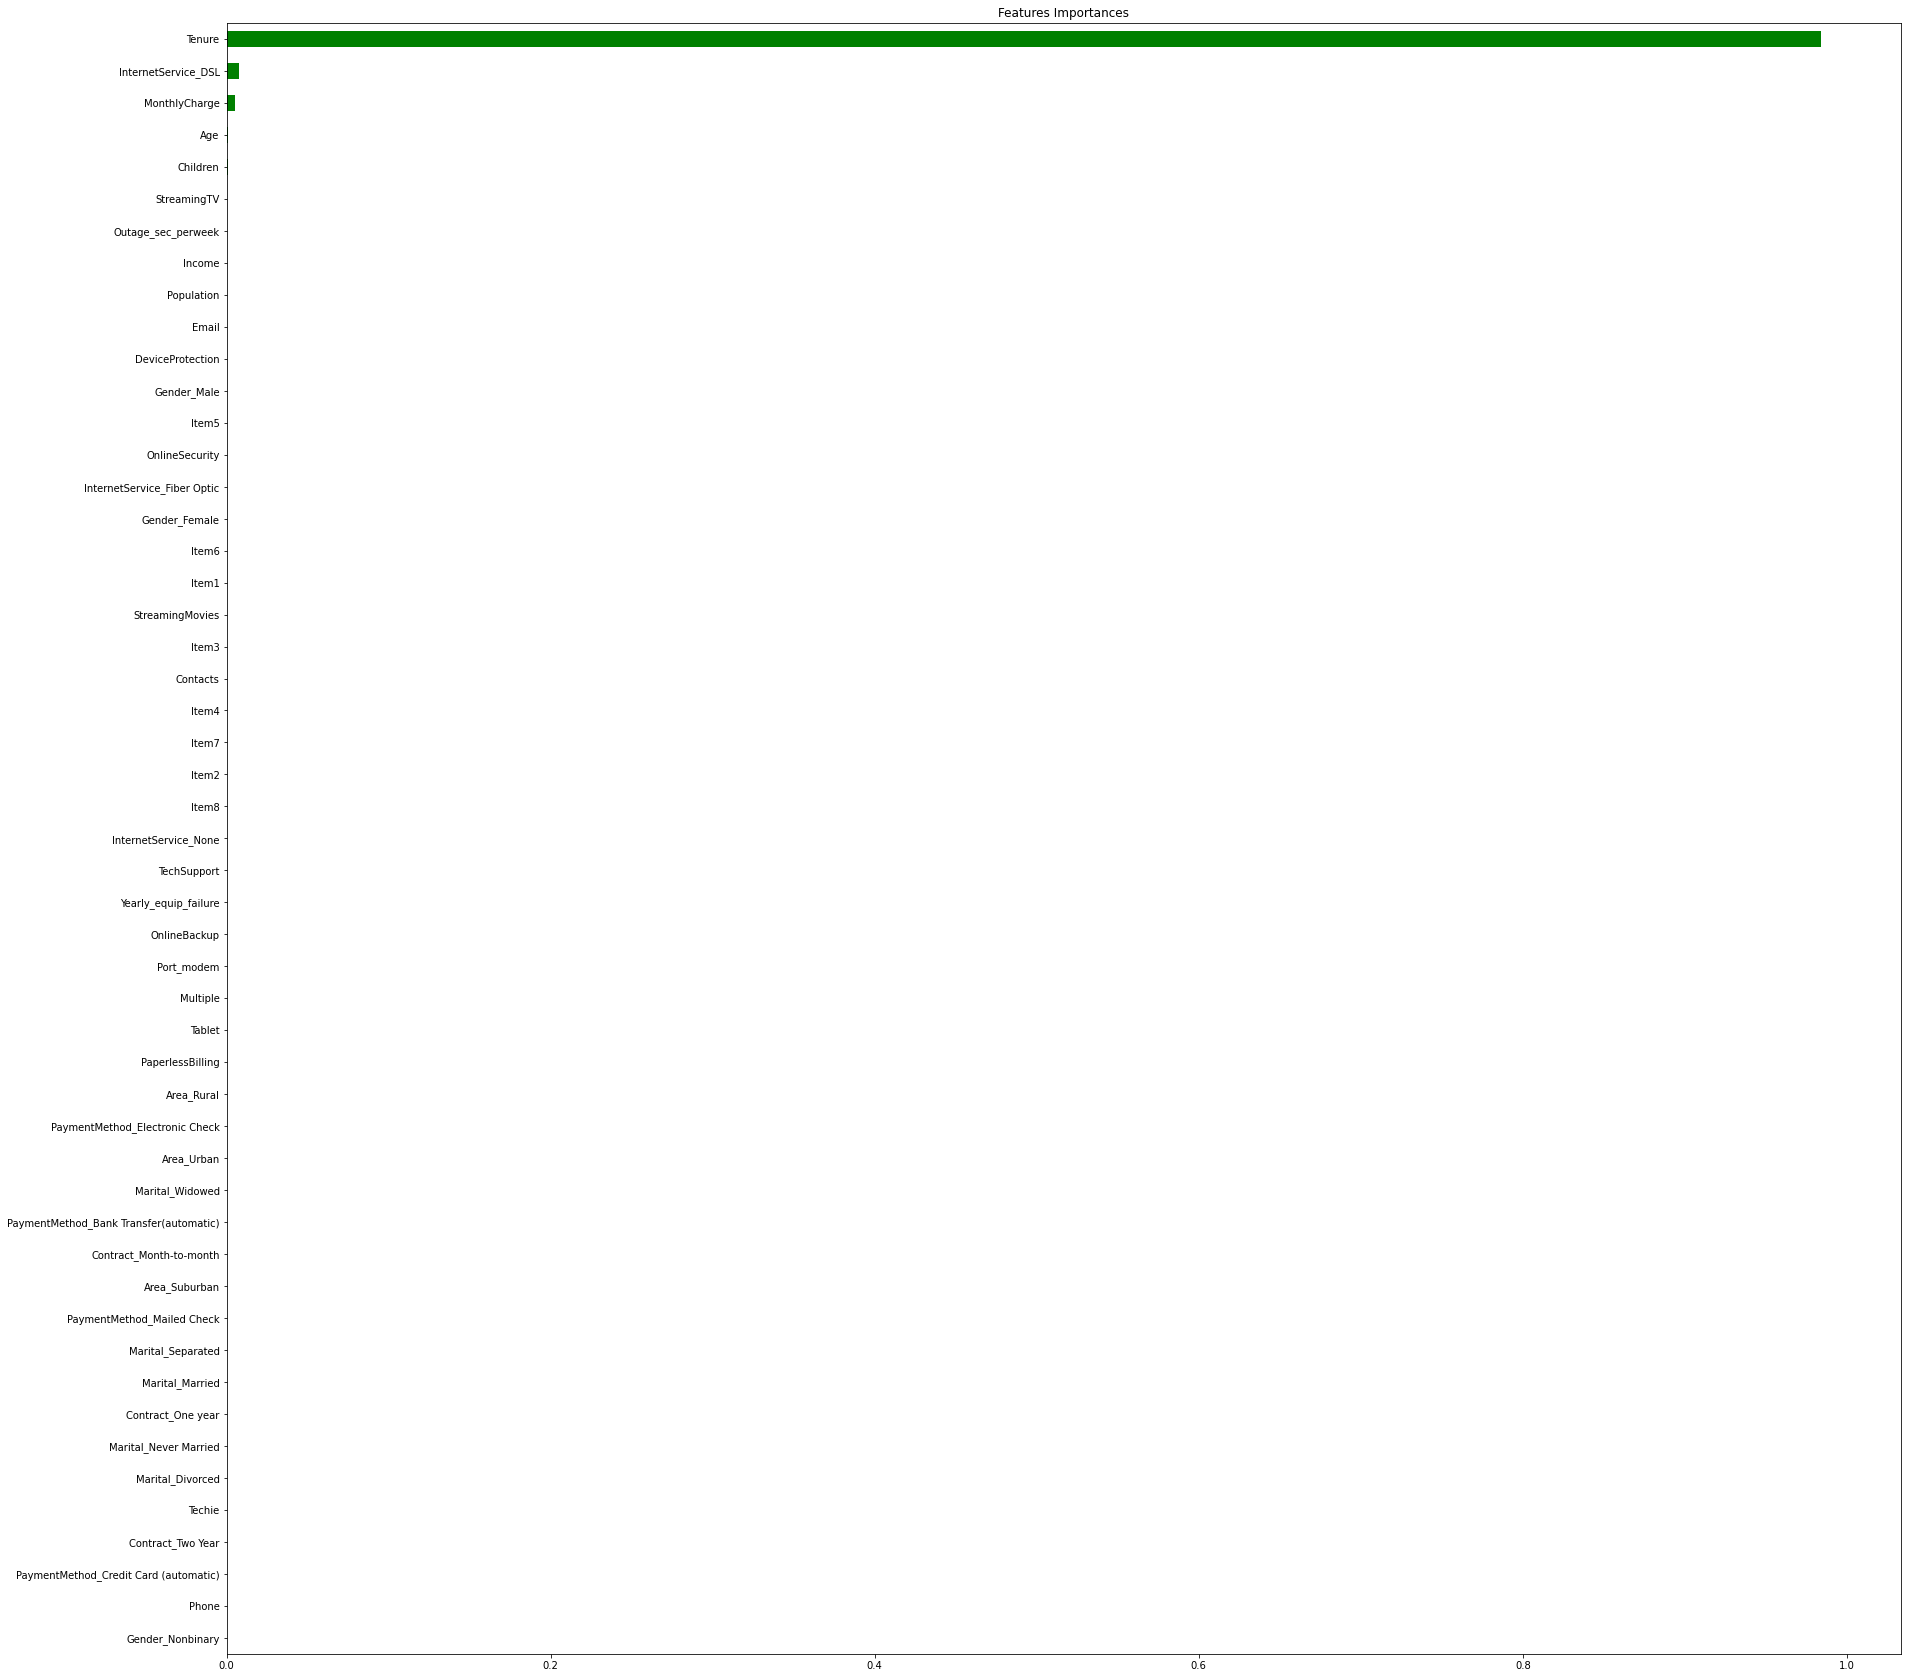

In [28]:
#plotting feature importances
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances = pd.Series(data=base_model.feature_importances_,
                        index= X2_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='green')
plt.yticks(fontsize = 10)
plt.title('Features Importances')
plt.rcParams['figure.figsize'] = [30,30]
plt.show()

In [29]:
print(importances_sorted)

Gender_Nonbinary                          0.000001
Phone                                     0.000008
PaymentMethod_Credit Card (automatic)     0.000010
Contract_Two Year                         0.000010
Techie                                    0.000011
Marital_Divorced                          0.000011
Marital_Never Married                     0.000011
Contract_One year                         0.000011
Marital_Married                           0.000012
Marital_Separated                         0.000013
PaymentMethod_Mailed Check                0.000013
Area_Suburban                             0.000013
Contract_Month-to-month                   0.000013
PaymentMethod_Bank Transfer(automatic)    0.000014
Marital_Widowed                           0.000014
Area_Urban                                0.000014
PaymentMethod_Electronic Check            0.000015
Area_Rural                                0.000017
PaperlessBilling                          0.000017
Tablet                         

### Taking a closer look at graphical relationships between target variable and numerical predictor variables.

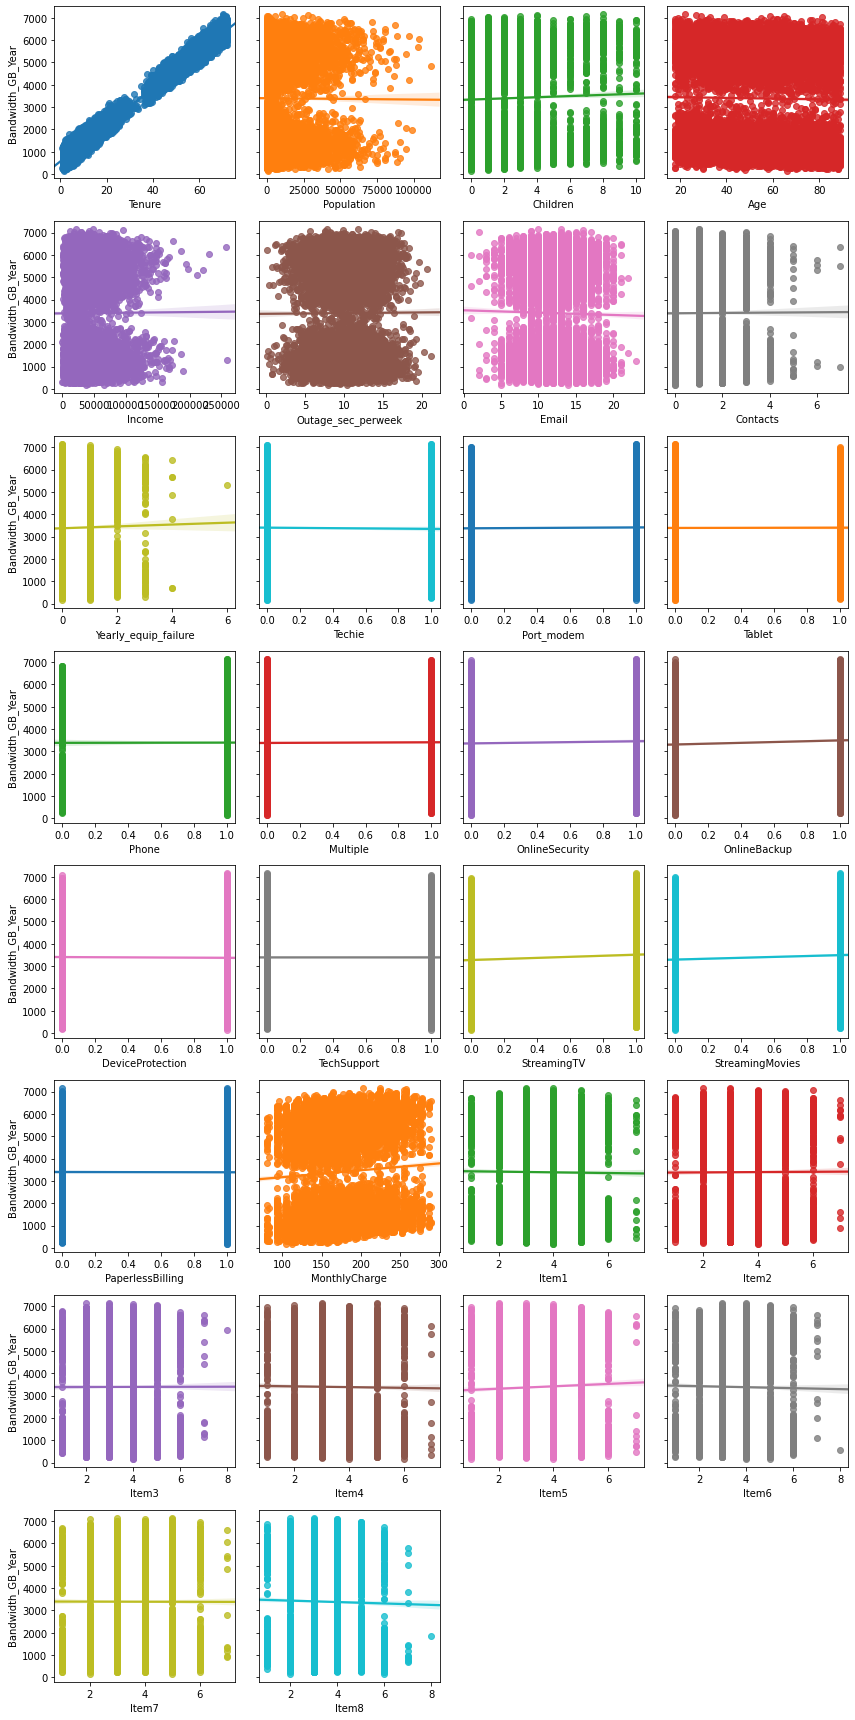

In [64]:
x_vars=['Tenure', 'Population', 'Children', 'Age',
       'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone',
       'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharge', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6',
       'Item7', 'Item8']

# Work out the figure parameters
nplot = len(x_vars)
ncol = 4
nrow = nplot // ncol + bool(nplot % ncol)

height, aspect = 3, 1
figsize = height * aspect * ncol, height * nrow

# Set up the figure
f, axs = plt.subplots(nrow, ncol, figsize=figsize, sharey=True)
for ax, xvar in zip(axs.flat, x_vars):
    sns.regplot(data=num_rf_df, x=xvar, y="Bandwidth_GB_Year", ax=ax)

# Remove axes without any data    
for ax in axs.flat[nplot:]:
    ax.remove()

# Turn off interior y axis labels
plt.setp(axs[:, 1:], ylabel="")

f.tight_layout()

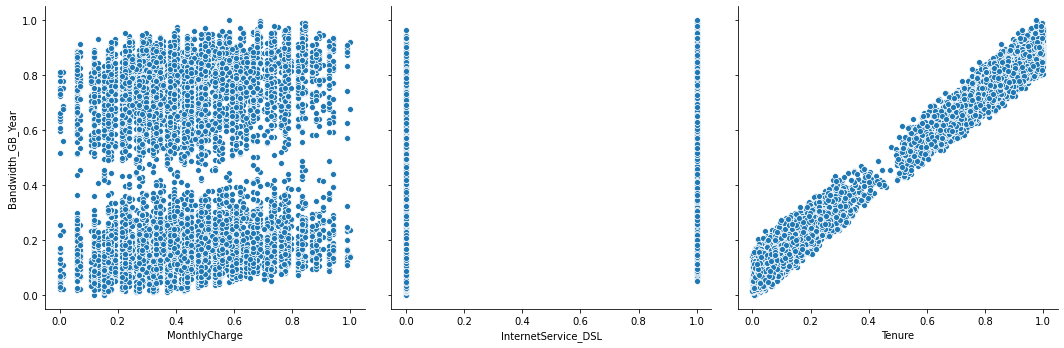

In [69]:
g = sns.PairGrid(scaled_features_df, y_vars=["Bandwidth_GB_Year"], x_vars=['MonthlyCharge', 'InternetService_DSL', 'Tenure'], height=5)
g.map(sns.scatterplot)

(array([1139., 2318., 1220.,  278.,  105.,  414.,  929., 1558., 1665.,
         374.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

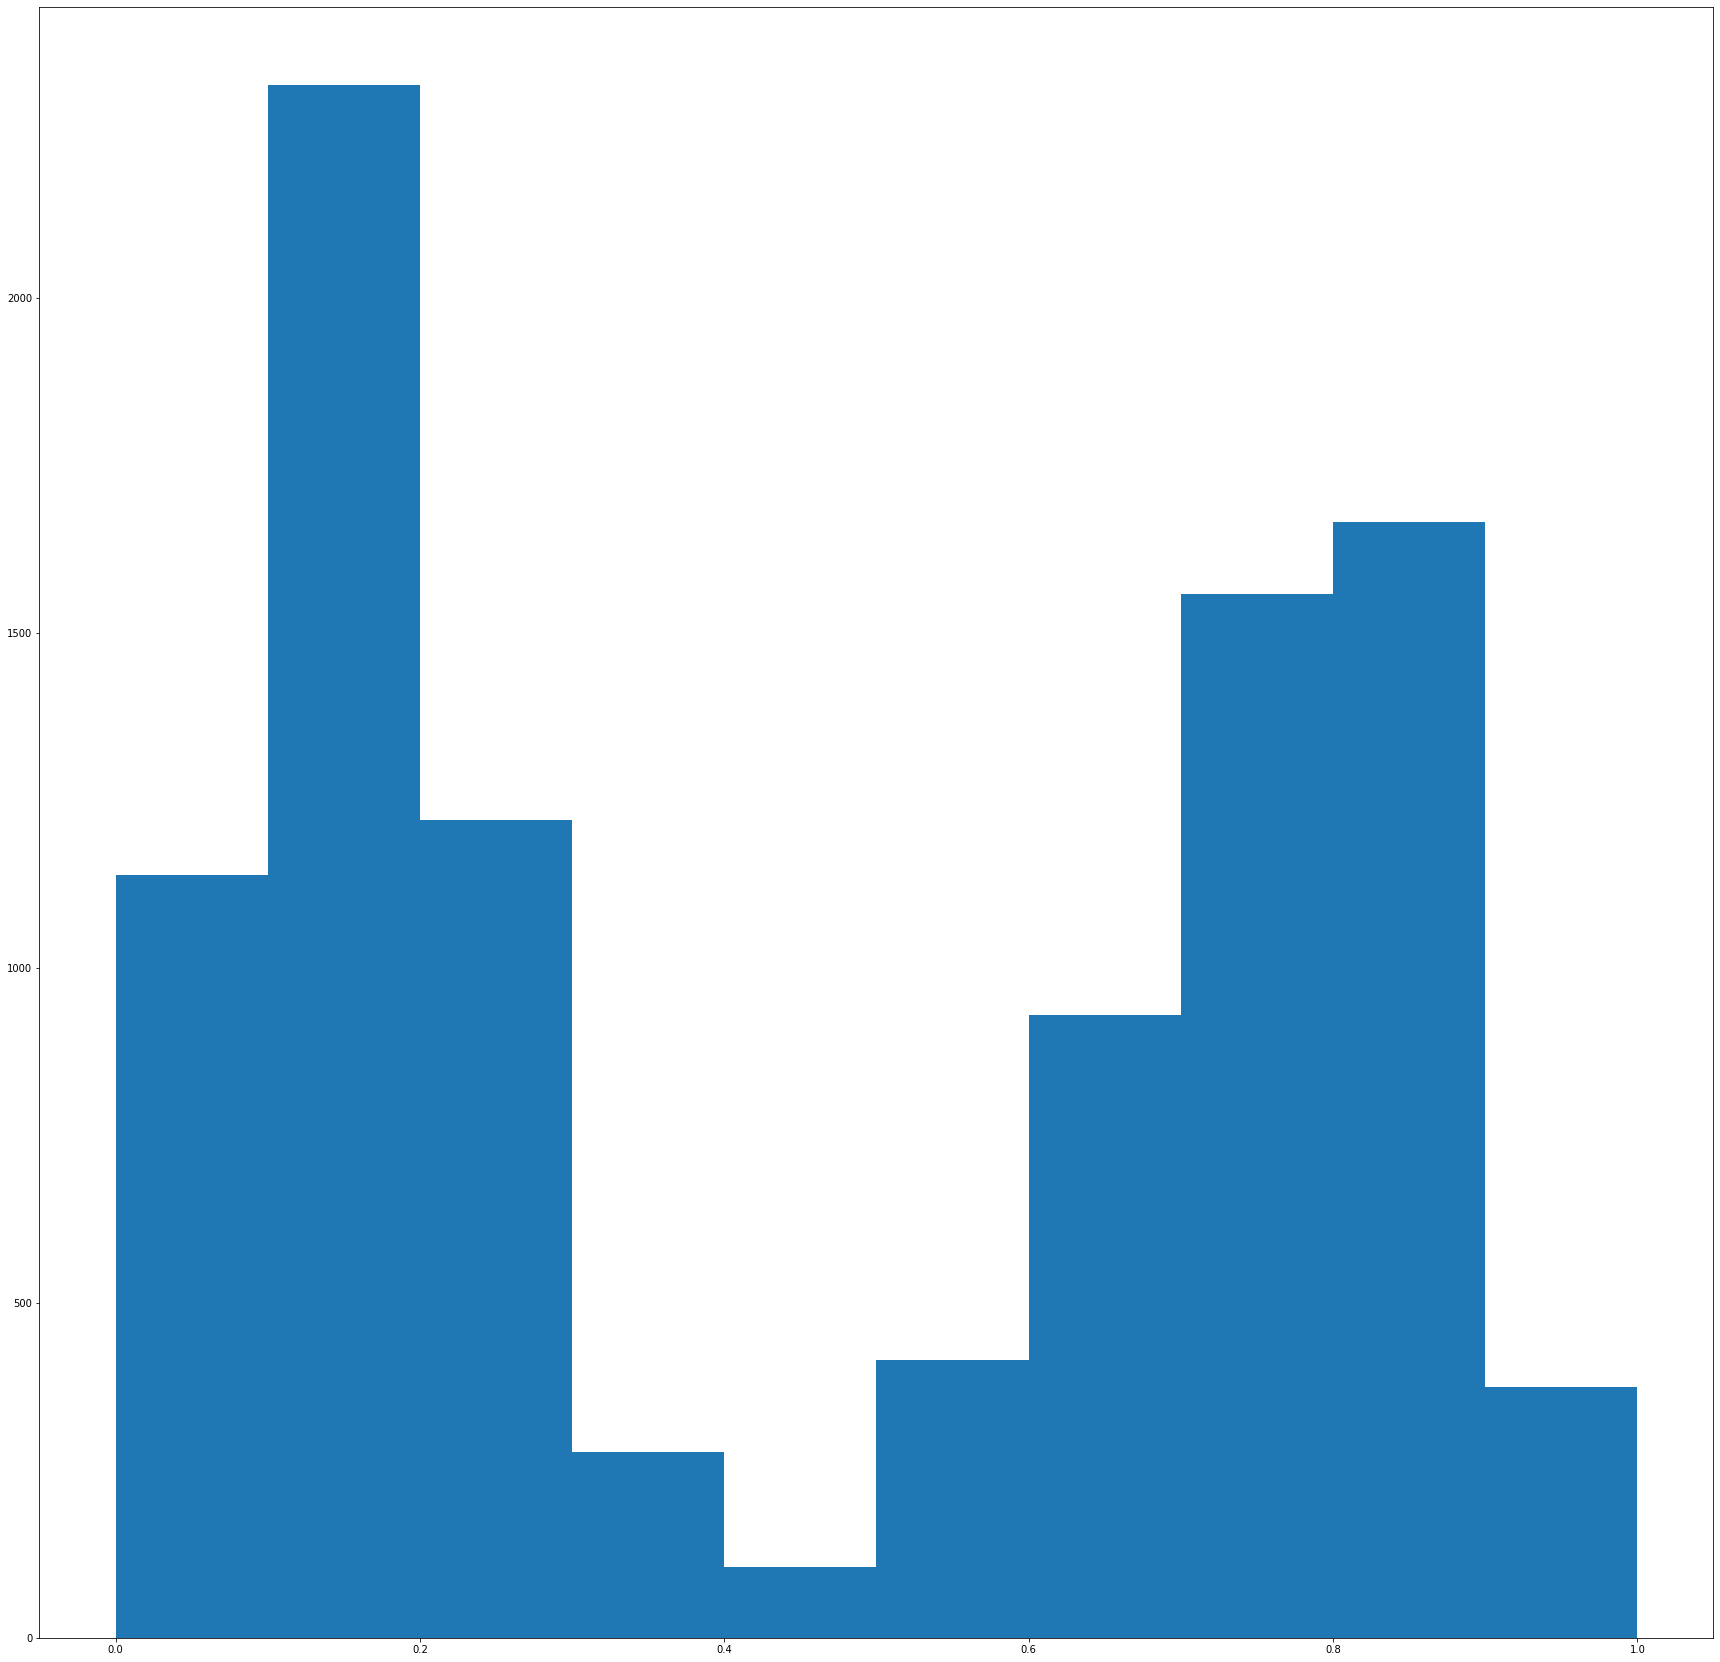

In [82]:
plt.hist(scaled_features_df['Bandwidth_GB_Year'])

### There doesn't seem to be a clear relationship between InternetService_DSL and Bandwidth usage, even though it's one of the most influential variables but not by much.  MonthlyCharge looks like it could be broken up into 2 segments with some appearance of linear relationship with bandwidth.  However, there just doesn't seem to be many customers with mid-range bandwidth usage, so the gap in many of the above relationships could likely be due to that fact.  There is a clear linear relationship between Tenure and bandwidth and it is by far the most influential variable.

# Compare to linear model

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
# Initialize the linear regression model
lin_model = LinearRegression()

# Train the model
lin_model.fit(X2_train, y2_train)

# Make predictions on the testing set
y2_pred = lin_model.predict(X2_test)

# Evaluate the model
mse = mean_squared_error(y2_test, y2_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y2_test, y2_pred)

print('MSE of best model: ', round(mse,2)) 
print('RMSE of best model: ', round(rmse,2)) 
print('R^2 of best model: ', round(r2,2)) 


MSE of best model:  0.0
RMSE of best model:  0.0
R^2 of best model:  1.0


### With an R^2 of 1 and rmse of 0 there definetely appears to be some overfitting with the general linear model.  

## Using ordinary least squares and feature elimination.

In [32]:
#from statsmodels.formula.api import ols
import statsmodels.api as sm
lin_mdl_1 = sm.OLS(y2,X2).fit()

In [33]:
lin_mdl_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.369e+07
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:52:38   Log-Likelihood:                 52623.
No. Observations:               10000   AIC:                        -1.052e+05
Df Residuals:                    9954   BIC:                        -1.048e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Tenure                                     0.8306   3.38e-05   2.45e+04      0.000       0.831       0.831
Population                                 0.0001   9.76e-05      1.052      0.293   -8.86e-05       0.000
Children                                   0.0439   5.87e-05    748.876      0.000       0.044       0.044
Age                                       -0.0332   4.32e-05   -768.284      0.000      -0.033      -0.033
Income                                 -4.767e-05      0.000     -0.413      0.680      -0.000       0.000
Outage_sec_perweek                     -7.185e-05   8.94e-05     -0.804      0.422      -0.000       0.000
Email                                   1.653e-05   9.16e-05      0.180      0.857      -0.000       0.000
Contacts                                4.804e-05   8.92e-05      0.538      0.590      -0.000       0.000
Yearly_equip_failure                    -1.21e-05      0.000     -0.102      0.919      -0.000       0.000
Techie                                 -1.595e-06   3.37e-05     -0.047      0.962   -6.77e-05    6.45e-05
Port_modem                             -3.157e-05   2.52e-05     -1.254      0.210   -8.09e-05    1.78e-05
Tablet                                 -7.493e-06   2.75e-05     -0.272      0.786   -6.15e-05    4.65e-05
Phone                                  -1.925e-05   4.33e-05     -0.444      0.657      -0.000    6.57e-05
Multiple                                  -0.0031   5.31e-05    -59.133      0.000      -0.003      -0.003
OnlineSecurity                             0.0097   2.66e-05    366.013      0.000       0.010       0.010
OnlineBackup                               0.0042    4.1e-05    101.275      0.000       0.004       0.004
DeviceProtection                           0.0070   3.11e-05    224.759      0.000       0.007       0.007
TechSupport                               -0.0045   3.16e-05   -142.370      0.000      -0.005      -0.004
StreamingTV                                0.0152   6.55e-05    232.058      0.000       0.015       0.015
StreamingMovies                            0.0085   7.91e-05    106.945      0.000       0.008       0.009
PaperlessBilling                        4.262e-05   2.56e-05      1.665      0.096   -7.57e-06    9.28e-05
MonthlyCharge                              0.0866      0.000    287.574      0.000       0.086       0.087
Item1                                     -0.0002      0.000     -1.505      0.132      -0.000    4.93e-05
Item2                                   5.022e-05      0.000      0.495      0.621      -0.000       0.000
Item3                                  -8.245e-05      0.000     -0.759      0.448      -0.000       0.000
Item4                                   -3.07e-05   8.32e-05     -0.369      0.712     

In [34]:
X2_lin2 = X2.drop(['Population', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
                  'Techie', 'Port_modem', 'Tablet', 'Phone', 'PaperlessBilling', 'Item1', 'Item2','Item3','Item4',
                  'Item5','Item6','Item7','Item8'], axis = 1)

In [35]:
lin_mdl_2 = sm.OLS(y2,X2_lin2).fit()
lin_mdl_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.371e+07
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:52:43   Log-Likelihood:                 52617.
No. Observations:               10000   AIC:                        -1.052e+05
Df Residuals:                    9973   BIC:                        -1.050e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Tenure                                     0.8306   3.38e-05   2.46e+04      0.000       0.831       0.831
Children                                   0.0439   5.86e-05    749.669      0.000       0.044       0.044
Age                                       -0.0332   4.32e-05   -769.041      0.000      -0.033      -0.033
Multiple                                  -0.0031    5.3e-05    -59.293      0.000      -0.003      -0.003
OnlineSecurity                             0.0097   2.65e-05    366.556      0.000       0.010       0.010
OnlineBackup                               0.0042    4.1e-05    101.368      0.000       0.004       0.004
DeviceProtection                           0.0070    3.1e-05    224.969      0.000       0.007       0.007
TechSupport                               -0.0045   3.16e-05   -142.631      0.000      -0.005      -0.004
StreamingTV                                0.0152   6.54e-05    232.314      0.000       0.015       0.015
StreamingMovies                            0.0085   7.89e-05    107.047      0.000       0.008       0.009
MonthlyCharge                              0.0866      0.000    287.991      0.000       0.086       0.087
Area_Rural                                 0.0038   2.02e-05    188.504      0.000       0.004       0.004
Area_Suburban                              0.0039   2.02e-05    193.205      0.000       0.004       0.004
Area_Urban                                 0.0039   2.03e-05    189.709      0.000       0.004       0.004
Marital_Divorced                           0.0023   2.54e-05     91.085      0.000       0.002       0.002
Marital_Married                            0.0023   2.63e-05     88.396      0.000       0.002       0.002
Marital_Never Married                      0.0023    2.6e-05     89.488      0.000       0.002       0.002
Marital_Separated                          0.0023   2.58e-05     88.606      0.000       0.002       0.002
Marital_Widowed                            0.0023   2.56e-05     90.400      0.000       0.002       0.002
Gender_Female                              0.0018   2.76e-05     64.711      0.000       0.002       0.002
Gender_Male                                0.0111   2.78e-05    397.210      0.000       0.011       0.011
Gender_Nonbinary                          -0.0013   6.12e-05    -20.890      0.000      -0.001      -0.001
Contract_Month-to-month                    0.0039   1.84e-05    209.859      0.000       0.004       0.004
Contract_One year                          0.0039   2.36e-05    163.376      0.000       0.004       0.004
Contract_Two Year                          0.0038   2.26e-05    170.076      0.000       0.004       0.004
InternetService_DSL                        0.0442   2.04e-05   2172.653      0.000     

### Again, Tenure has by far the most influence on bandwidth usage according to the magnitute of its coefficient.

In [84]:
lin_mdl_3 = sm.OLS(df['Bandwidth_GB_Year'], df['Tenure']).fit()
lin_mdl_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          8.115e+05
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        14:37:37   Log-Likelihood:                         -75174.
No. Observations:               10000   AIC:                                  1.504e+05
Df Residuals:                    9999   BIC:                                  1.504e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tenure        92.2225      0.102    900.845      0.000      92.022      92.423
==============================================================================
Omnibus:                      239.298   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.321
Skew:                           0.075   Prob(JB):                     1.37e-28
Kurtosis:                       2.466   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
df['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141369
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

# Conclusion

Using random grid search cross validation appears to have missed the better performing results obtained from the base random forest model. This shouldn't be a surprise because of the random parameters it selects, but should serve as a cautionary tale to not rely on it to find the best model.   

Both random forest and linear models showed that Tenure is the most influential variable on bandwidth usage with a high level of accuracy.  Tenure accounts for over 98% of this influence, and on average, for every year a customer remains their yearly bandwidth usage goes up by about 92GB. 

Many ISPs offer discounts to new customers, but this analysis shows that those who have subsribed for longer durations use more.  Overall, it costs more to bring in new customers, so to cut costs perhaps discounts or rewards can be offered to those who stick around longer.  Further testing would be needed to see how this kind of offering would impact churn, but it doesn't seem unreasonable that such a decision would result in greater customer satisfaction. 

### (towards data science code  https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [36]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [37]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X2_train, y2_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: 

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X2_train, y2_train)

In [ ]:
#rs_20 = rs.fit(X20_train, y20_train)
#rs_25 = rs.fit(X25_train, y25_train)
#rs_30 = rs.fit(X30_train, y30_train)

In [ ]:
# mean squared error (defined from scorer)
#print(rs_20.cv_results_['mean_test_score'])
#print(rs_25.cv_results_['mean_test_score'])
#print(rs_30.cv_results_['mean_test_score'])

In [ ]:
#plotting feature importances
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances = pd.Series(data=best_model.feature_importances_,
                        index= X2_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='green')
plt.yticks(fontsize = 15)
plt.title('Features Importances')
plt.rcParams['figure.figsize'] = [30,30]
plt.show()

In [ ]:
print(importances_sorted) 

In [ ]:
rf_df_ohe['Bandwidth_GB_Year'].describe()

In [ ]:
importances_sorted

After including a wider range of paramameters, the rmse of the best fit model decreased somewhat, but Tenure is still by far the most influential feature.  Let's take it out.

In [ ]:
X3 = X2.drop('Tenure', axis = 1)

In [ ]:
X3_train, X3_test, y2_train, y2_test = train_test_split(X3, y2, test_size = 0.2, random_state=42)

In [ ]:
rs.fit(X3_train, y2_train)

In [ ]:
# mean squared error (defined from scorer)
rs.cv_results_['mean_test_score']

In [ ]:
# Extract the best estimator
best_model = rs.best_estimator_

# Predict test set labels
y2_pred = best_model.predict(X3_test)

# Compute mean squared error
mse = mean_squared_error(y2_test, y2_pred)
# Compute root mean squared error
rmse = MSE(y2_test, y2_pred)**(1/2)
# Compute R^2
r2 = r2_score(y2_test,y2_pred)
oob_score = best_model.score(X3_test, y2_test)
# Print rmse_test
print(best_model)
print('MSE of best model: ', round(mse,2)) 
print('RMSE of best model: ', round(rmse,2)) 
print('R^2 of best model: ', round(r2,2)) 
print('oob_score: ', round(oob_score,2))

### This resulted in worse performance according to RMSE.  

#### What if we limit the features to only the top 10 most important?

In [ ]:
X10 = X2[["StreamingTV", "InternetService_Fiber Optic", "Email", "Age", "Outage_sec_perweek", "Income", "Population", "MonthlyCharge", "InternetService_DSL", "Tenure"  ]]

In [ ]:
#print(X10)

In [ ]:
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y2, test_size = 0.2, random_state=42)

In [ ]:
rs.fit(X10_train, y10_train)

In [ ]:
# Extract the best estimator
best_model = rs.best_estimator_


# Predict test set labels
y10_pred = best_model.predict(X10_test)


# Compute mean squared error
mse = mean_squared_error(y10_test, y10_pred)


# Compute root mean squared error
rmse = MSE(y10_test, y10_pred)**(1/2)


# Compute R^2
r2 = r2_score(y10_test,y10_pred)


# oob_score
oob_score = best_model.score(X10_test, y10_test)


# Print rmse_test
print("Results for 80/20 split:")
print(best_model)
print('MSE of best model: ', round(mse,2)) 
print('RMSE of best model: ', round(rmse,2)) 
print('R^2 of best model: ', round(r2,2)) 
print('oob_score: ', round(oob_score,2))

#### Only 2% variation!!! Really good!  Skeptical about possible overfitting though.

#### I want to try one more thing - 2 models: one for only continuous variables, one for categorical.

In [ ]:
Xcat = obj_rf_df

In [ ]:
Xcat.head()

In [ ]:
Xcat.columns

In [ ]:
Xcont_1 = df.select_dtypes(include='number').drop(["Tenure", "Item1", "Item2", "Item3", "Item4", "Item5", "Item6", "Item7", "Item8",
                                                "CaseOrder", "Zip", "Lat", "Lng"], axis=1)

#drop('Tenure', axis = 1)

In [ ]:
Xcont_1.head()

In [ ]:
Xcont = X2[["Population", "Children", "Income", "Outage_sec_perweek", "Email", "Contacts", "Yearly_equip_failure",
           "MonthlyCharge", "Tenure"]]

In [ ]:
Xcont.head()

In [ ]:
Xcont_train, Xcont_test, ycont_train, ycont_test = train_test_split(Xcont, y2, test_size = 0.2, random_state=42)

In [ ]:
rs.fit(Xcont_train, ycont_train)

In [ ]:
# Extract the best estimator
best_model = rs.best_estimator_


# Predict test set labels
ycont_pred = best_model.predict(Xcont_test)


# Compute mean squared error
mse = mean_squared_error(ycont_test, ycont_pred)


# Compute root mean squared error
rmse = MSE(ycont_test, ycont_pred)**(1/2)


# Compute R^2
r2 = r2_score(ycont_test,ycont_pred)


# oob_score
oob_score = best_model.score(Xcont_test, ycont_test)


# Print rmse_test
print("Results for 80/20 split:")
print(best_model)
print('MSE of best model: ', round(mse,2)) 
print('RMSE of best model: ', round(rmse,2)) 
print('R^2 of best model: ', round(r2,2)) 
print('oob_score: ', round(oob_score,2))

In [ ]:
# Create a pd.Series of features importances
importances = pd.Series(data=best_model.feature_importances_,
                        index= Xcont_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='green')
plt.yticks(fontsize = 15)
plt.title('Features Importances')
plt.rcParams['figure.figsize'] = [30,30]
plt.show()

### The model using only continuous variables performed much better, but Tenure is the only feature that seems to matter.

In [ ]:
Xcont2 = X2[["Population", "Children", "Income", "Outage_sec_perweek", "Email", "Contacts", "Yearly_equip_failure",
           "MonthlyCharge", "Tenure", "Item1", "Item2", "Item3", "Item4", "Item5", "Item6", "Item7", "Item8"]]


In [ ]:
Xcont2_train, Xcont2_test, ycont2_train, ycont2_test = train_test_split(Xcont2, y2, test_size = 0.2, random_state=42)

In [ ]:
rs.fit(Xcont2_train, ycont2_train)

In [ ]:
# Extract the best estimator
best_model = rs.best_estimator_


# Predict test set labels
ycont2_pred = best_model.predict(Xcont2_test)


# Compute mean squared error
mse = mean_squared_error(ycont2_test, ycont2_pred)


# Compute root mean squared error
rmse = MSE(ycont2_test, ycont2_pred)**(1/2)


# Compute R^2
r2 = r2_score(ycont2_test,ycont2_pred)


# oob_score
oob_score = best_model.score(Xcont2_test, ycont2_test)


# Print rmse_test
print("Results for 80/20 split:")
print(best_model)
print('MSE of best model: ', round(mse,2)) 
print('RMSE of best model: ', round(rmse,2)) 
print('R^2 of best model: ', round(r2,2)) 
print('oob_score: ', round(oob_score,2))

#### Including the 8 survey items had similiar results.

#### Let's try a model using only categorical features

In [ ]:
Xcat_noscale = rf_df.select_dtypes(include=['object']).copy()

In [ ]:
Xcat_noscale.columns

In [ ]:
Xcat = pd.get_dummies(rf_df, columns = ['Area', 'Marital', 'Gender', 'Contract', 'InternetService', 'PaymentMethod']) 

In [ ]:
Xcat_train, Xcat_test, ycat_train, ycat_test = train_test_split(Xcat, y2, test_size = 0.2, random_state=42)

In [ ]:
rs.fit(Xcat_train, ycat_train)

In [ ]:
# Extract the best estimator
best_model = rs.best_estimator_


# Predict test set labels
ycat_pred = best_model.predict(Xcat_test)


# Compute mean squared error
mse = mean_squared_error(ycat_test, ycat_pred)


# Compute root mean squared error
rmse = MSE(ycat_test, ycat_pred)**(1/2)


# Compute R^2
r2 = r2_score(ycat_test,ycat_pred)


# oob_score
oob_score = best_model.score(Xcat_test, ycat_test)


# Print rmse_test
print("Results for 80/20 split:")
print(best_model)
print('MSE of best model: ', round(mse,2)) 
print('RMSE of best model: ', round(rmse,2)) 
print('R^2 of best model: ', round(r2,2)) 
print('oob_score: ', round(oob_score,2))

#### This didn't make for a very good model according to the RMSE.

#### Looking only at number of estimators and oob_scores

In [ ]:
# Establish model
model = RandomForestRegressor(n_jobs=-1)

In [ ]:
# Create a pd.Series of features importances
importances = pd.Series(data=best_model.feature_importances_,
                        index= X3_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='green')
plt.yticks(fontsize = 15)
plt.title('Features Importances')
plt.rcParams['figure.figsize'] = [30,30]
plt.show()

In [ ]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X2_train, y2_train)
    scores.append(model.score(X2_test, y2_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.yticks(fontsize = 15)
plt.plot(estimators, scores)

### Compare to a linear model

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state=42)

In [ ]:
X2.head()

In [ ]:
y2.head()

In [ ]:
lin_model.summary()